In [1]:
import pickle
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import random

In [4]:
idx23_0 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2023/order0.p","rb"))
txt23_0 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2023/txt0.p","rb"))
img23_0 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2023/img0.p","rb"))

In [5]:
idx23_1 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2023/order1.p","rb"))
txt23_1 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2023/txt1.p","rb"))
img23_1 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2023/img1.p","rb"))

In [6]:
df_train = pd.read_csv("/data/cc3m/cc3m_2023/Train_GCC-training.tsv", sep='\t', names=["caption","url"], usecols=range(0,2))

In [7]:
print("min idx:",min(idx23_0))
print("max idx:",max(idx23_0))

min idx: 2
max idx: 3070366


In [8]:
print("idx23_0 length:",len(idx23_0))
print("txt23_0 shape:",txt23_0.shape)
print("img23_0 shape:",img23_0.shape)

idx23_0 length: 2560256
txt23_0 shape: (2560256, 512)
img23_0 shape: (2560256, 512)


In [9]:
df_train

,caption,url
0,a very typical bus station,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...
1,sierra looked stunning in this top and this sk...,http://78.media.tumblr.com/3b133294bdc7c7784b7...
2,young confused girl standing in front of a war...,https://media.gettyimages.com/photos/young-con...
3,interior design of modern living room with fir...,https://thumb1.shutterstock.com/display_pic_wi...
4,cybernetic scene isolated on white background .,https://thumb1.shutterstock.com/display_pic_wi...
...,...,...
3318328,the teams line up for a photo after kick - off,https://i0.wp.com/i.dailymail.co.uk/i/pix/2015...
3318329,stickers given to delegates at the convention .,http://cdn.radioiowa.com/wp-content/uploads/20...
3318330,this is my very favourite design that i recent...,https://i.pinimg.com/736x/96/f0/77/96f07728efe...
3318331,man driving a car through the mountains,https://www.quickenloans.com/blog/wp-content/u...


In [10]:
i=1940906
j=1601006

In [11]:
ii = idx23_0.index(i+1)
jj = idx23_0.index(j+1)

In [12]:
print(ii)
print(jj)
print(idx23_0[ii])

1618679
1349653
1940907


In [13]:
print("caption comparison:", np.sum(txt23_0[ii] * txt23_0[jj]))
print("image comparison(embedding):", np.sum(img23_0[ii]*img23_0[jj])) 
print("image comparison:", np.sum(img23_0[ii]!=img23_0[jj])) 
# images are not same, but very similar!

caption comparison: 1.0
image comparison(embedding): 0.967
image comparison: 511


In [14]:
rows = open("cc3m/cc3m_2023/Train_GCC-training.tsv").readlines()
print(rows[i], rows[j])

holiday written in the sand	http://www.colinaclub.com/img/holiday.jpg
 a simple floral arrangement of white and black flowers in a simple white vase .	https://lifebeautifulmagazine.com/images/spring/spring12/_md/spring12_table6.jpg



In [15]:
print(df_train['caption'][i])
print(df_train['caption'][j])

holiday written in the sand
a simple floral arrangement of white and black flowers in a simple white vase .


In [16]:
print(df_train['caption'][i-1])
print(df_train['caption'][j-1])

# holds off ice hockey left winger # 23 after losing his stick during a game .
# holds off ice hockey left winger # 23 after losing his stick during a game .


In [17]:
print(df_train['url'][i-1])
print(df_train['url'][j-1])
#As we can see images are almost same. The former is a bit larger(scaled up kind of) and has watermark, but both former and latter depict ...
#same scene!

https://media.gettyimages.com/photos/dalton-prout-of-the-springfield-falcons-holds-off-john-persson-of-the-picture-id159795291
https://media.gettyimages.com/photos/dalton-prout-of-the-springfield-falcons-holds-off-john-persson-of-the-picture-id159795291?k=6&m=159795291&s=612x612&w=0&h=ZjJ7JvqLy97yrYtt5vQ4sdEfgaaTFjfQvX_Y0L1jj74=


In [18]:
#Let's find some other matching captions to make sure we understand how indexes work
#Find the duplicated captions and pick the first one
cpt_num = 1893
cpt = df_train[df_train.duplicated(subset=['caption'],keep=False)]['caption'].iloc[cpt_num]
print("chosen duplicated caption:",cpt)
indexes = df_train[df_train['caption'] == cpt].index
print("indexes of that caption:",indexes)
#When finding the position of i in idx23_0, we searched for i+1. The indexes we have are already 1 less than i's ...
#so we now need to search for indexes + 2!
for k in range(1,len(indexes)):
    print("comparing with ",k+1,"th index: ",np.sum(txt23_0[idx23_0.index(indexes[0]+2)] * txt23_0[idx23_0.index(indexes[k]+2)]))

chosen duplicated caption: property image # - 5 to 20 bedroom
indexes of that caption: Index([4723, 292325, 506932, 598121, 847323, 1499942, 3047811, 3236324], dtype='int64')
comparing with  2 th index:  1.0
comparing with  3 th index:  1.0
comparing with  4 th index:  1.0
comparing with  5 th index:  1.0
comparing with  6 th index:  1.0


ValueError: 3047813 is not in list

In [19]:
df_train[df_train['caption']==cpt]

,caption,url
4723,property image # - 5 to 20 bedroom,https://odis.homeaway.com/odis/listing/642907a...
292325,property image # - 5 to 20 bedroom,https://odis.homeaway.com/odis/listing/a1f4479...
506932,property image # - 5 to 20 bedroom,https://odis.homeaway.com/odis/listing/943cd29...
598121,property image # - 5 to 20 bedroom,https://odis.homeaway.com/odis/listing/e1d003c...
847323,property image # - 5 to 20 bedroom,https://odis.homeaway.com/odis/listing/beac924...
1499942,property image # - 5 to 20 bedroom,https://odis.homeaway.com/odis/listing/a57ddc0...
3047811,property image # - 5 to 20 bedroom,https://odis.homeaway.com/odis/listing/a7b26cf...
3236324,property image # - 5 to 20 bedroom,https://odis.homeaway.com/odis/listing/4e88cb4...


In [21]:
#Turns out url is no longer accessible!
df_train['url'][3047811]

'https://odis.homeaway.com/odis/listing/a7b26cfa-789a-43fb-9d77-9cb0983d05f8.c10.jpg'

In [22]:
#I realized some url actually return an image but not included in order

In [23]:
max_idx23_0 = max(idx23_0)
max_idx23_0

3070366

In [25]:
##Check if they are in order1. They are!
print(idx23_1.index(max_idx23_0+91))
print(idx23_1.index(max_idx23_0+12345))

589
38881


In [26]:
x = 3041366 + 12345
print(idx23_1.index(x))
df_train['url'][x-2]

9375


'https://i.pinimg.com/736x/7e/ab/b4/7eabb4c8b2aaa5bce1be9c857826f8fd--film-icon-marlon-brando.jpg'

In [27]:
#Now look at 2018 data and compare it with current data

In [28]:
idx18_0 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2018_b/order0.p","rb"))
txt18_0 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2018_b/txt0.p","rb"))
img18_0 = pickle.load(open("../../data/cc3m_embed/embed_cc3m_2018_b/img0.p","rb"))

In [29]:
idx18_1 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2018_b/order1.p","rb"))
txt18_1 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2018_b/txt1.p","rb"))
img18_1 = pickle.load(open("/data/cc3m_embed/embed_cc3m_2018_b/img1.p","rb"))

In [30]:
print("idx18_0 len: ", len(idx18_0))
print("idx18_1 len: ", len(idx18_1))

idx18_0 len:  2560256
idx18_1 len:  758013


In [31]:
print("min idx18_0:",min(idx18_0))
print("max idx18_0:",max(idx18_0))
print("min idx18_1:",min(idx18_1))
print("max idx18_1:",max(idx18_1))

min idx18_0: 2
max idx18_0: 2599696
min idx18_1: 2560001
max idx18_1: 3318334


In [32]:
#2018 data has nearly all the images
print((len(idx18_0)+len(idx18_1))/len(df_train)*100)
print(len(df_train) - (len(idx18_0)+len(idx18_1)))

99.99807132075051
64


In [34]:
idx18 = idx18_0 + idx18_1
txt18 = np.concatenate((txt18_0, txt18_1), axis=0)
img18 = np.concatenate((img18_0, img18_1), axis=0)
idx23 = idx23_0 + idx23_1
txt23 = np.concatenate((txt23_0, txt23_1), axis=0)
img23 = np.concatenate((img23_0, img23_1), axis=0)

In [35]:
#But it has some duplicates
count_idx18 = np.zeros(max(idx18)+1)
for i in range(len(idx18)):
    count_idx18[idx18[i]] += 1
print("18 without duplicates: ", np.sum(count_idx18 > 0.5)/len(df_train)*100)
print("#ids duplicated: ",np.sum(count_idx18>1.1))
print("tot # of duplications: ", np.sum(count_idx18[count_idx18>1.1]))

18 without duplicates:  99.98237066623513
#ids duplicated:  513
tot # of duplications:  1034.0


In [36]:
#2018 data has nearly 84% of images
(len(idx23_0)+len(idx23_1))/len(df_train)*100

84.13983768355979

In [37]:
#some indexes are in 2023 data but not in 2018!
missing_indexes = list(set(idx23) - set(idx18))
len(missing_indexes)

465

In [38]:
x = 987
print(idx23_0.index(x))
print(idx18_0.index(x))
print(np.sum(txt23_0[idx23_0.index(x)] * txt18_0[idx18_0.index(x)]))
print(np.sum(img23_0[idx23_0.index(x)] * img18_0[idx18_0.index(x)]))

3134
13416
1.0
0.9775


In [39]:
print(np.sum(img23_0[idx23_0.index(x)] * img23_0[idx23_0.index(x)]))
print(np.sum(img18_0[idx18_0.index(x)] * img18_0[idx18_0.index(x)]))

1.0
1.0


In [127]:
inv_idx18 = np.zeros(max(idx18)+1)
for i in range(len(idx18)):
    inv_idx18[idx18[i]] = i

missing_indexes = list(set(idx23) - set(idx18))

save_freq = 50000

with open('comparison_2.txt', 'a') as f:
    for i in range(len(idx23)):
        idx_c = idx23[i]
        if idx_c in missing_indexes:
            continue
        txt_c = np.sum(txt23[i]*txt18[int(inv_idx18[idx_c])])
        img_c = np.sum(img23[i]*img18[int(inv_idx18[idx_c])])
        f.write(str(i)+','+str(idx_c)+','+str(txt_c)+','+str(img_c)+'\n')
        if i % save_freq == 0 and i != 0:
            print("step: ",i)
print("completed")

step:  50000
step:  100000
step:  150000
step:  200000
step:  250000
step:  300000
step:  350000
step:  400000
step:  450000
step:  500000
step:  550000
step:  600000
step:  650000
step:  700000
step:  750000
step:  800000
step:  850000
step:  900000
step:  950000
step:  1000000
step:  1050000
step:  1100000
step:  1150000
step:  1200000
step:  1250000
step:  1300000
step:  1350000
step:  1400000
step:  1450000
step:  1500000
step:  1550000
step:  1600000
step:  1650000
step:  1700000
step:  1750000
step:  1800000
step:  1850000
step:  1900000
step:  1950000
step:  2000000
step:  2050000
step:  2100000
step:  2150000
step:  2200000
step:  2250000
step:  2300000
step:  2350000
step:  2400000
step:  2450000
step:  2500000
step:  2550000
step:  2600000
step:  2650000
step:  2700000
step:  2750000
completed


In [40]:
deneme = pd.read_csv("comparison_new.txt", sep=',',names=['idx','caption','image'])

In [41]:
deneme

,idx,caption,image
0,24,1.0,0.9710
1,2,1.0,0.9526
2,25,1.0,0.9670
3,38,1.0,0.8540
4,6,1.0,0.9507
...,...,...,...
2792035,3309990,1.0,0.9140
2792036,3309968,1.0,0.8555
2792037,3309953,1.0,0.9540
2792038,3309998,1.0,0.9350


In [42]:
deneme2 = pd.read_csv("comparison_2.txt", sep=',',names=['idx','caption','image'])

In [43]:
deneme2

,idx,caption,image
0,24,1.0,0.9710
1,2,1.0,0.9526
2,25,1.0,0.9670
3,38,1.0,0.8540
4,6,1.0,0.9507
...,...,...,...
2792035,3309990,1.0,0.9140
2792036,3309968,1.0,0.8555
2792037,3309953,1.0,0.9540
2792038,3309998,1.0,0.9350


In [44]:
len(idx23)

2792040

In [74]:
deneme.to_csv("comparison2.tsv",index=True,sep='\t')

In [45]:
comparison = pd.read_csv("comparison.tsv", sep='\t',index_col=0)

In [46]:
comparison

,idx,caption,image
0,24,1.0,0.9710
1,2,1.0,0.9526
2,25,1.0,0.9670
3,38,1.0,0.8540
4,6,1.0,0.9507
...,...,...,...
2792035,3309990,1.0,0.9140
2792036,3309968,1.0,0.8555
2792037,3309953,1.0,0.9540
2792038,3309998,1.0,0.9350


In [47]:
comp_np = comparison.to_numpy()

In [48]:
comp_np[:,2]

array([0.971 , 0.9526, 0.967 , ..., 0.954 , 0.935 , 0.9546])

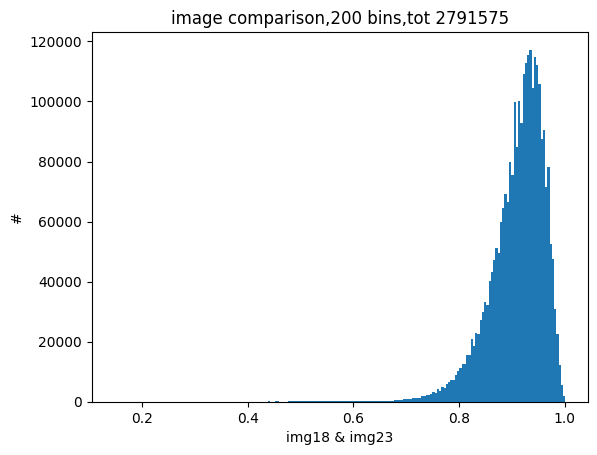

In [49]:
plt.hist(comp_np[:,2],200)
plt.xlabel("img18 & img23")
plt.ylabel("#")
plt.title("image comparison,200 bins,tot 2791575")
plt.savefig('plots/img_comparison.png')
#plt.show()

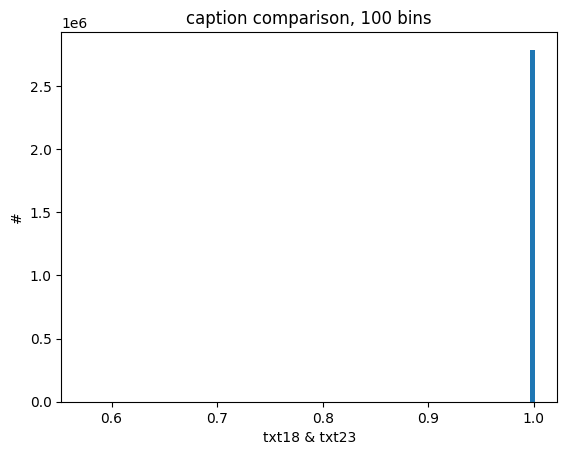

In [123]:
plt.hist(comp_np[:,1],100)
plt.xlabel("txt18 & txt23")
plt.ylabel("#")
plt.title("caption comparison, 100 bins")
plt.savefig('plots/txt_comparison_full.png')
plt.show()

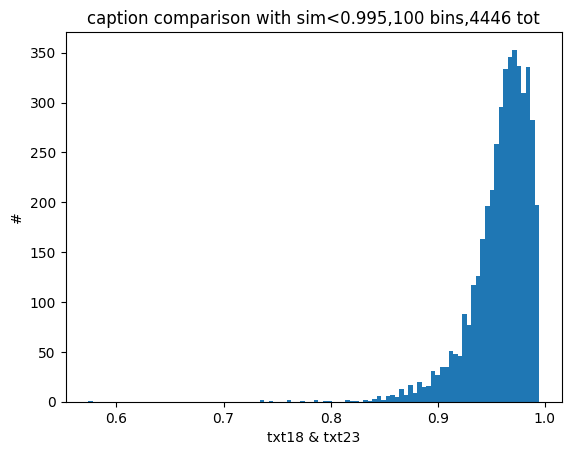

In [119]:
plt.hist(comp_np[comp_np[:,1]<0.995][:,1],100)
plt.xlabel("txt18 & txt23")
plt.ylabel("#")
plt.title("caption comparison with sim<0.995,100 bins,4446 tot")
plt.show()
#plt.savefig('plots/txt_comparison.png')

In [113]:
print("# of txt sim < 0.99: ",np.sum(comp_np[:,1]<0.995))
print("% of txt sim < 0.99: ",np.sum(comp_np[:,1]<0.995)/len(comparison)*100)

# of txt sim < 0.99:  4446
% of txt sim < 0.99:  0.15926493108728942


In [101]:
comparison[comparison['caption']<0.99]

,idx,caption,image
595,20027,0.8870,0.9510
754,20297,0.9595,0.8200
2888,30695,0.9614,0.8726
4345,1519,0.9497,0.8916
4437,11316,0.9730,0.9650
...,...,...,...
2788650,3298728,0.9640,0.9560
2788898,3308333,0.9336,0.9230
2790141,3289458,0.9550,0.9390
2790440,3299557,0.9634,0.9190


In [104]:
x = 1519
np.sum(txt23[idx23.index(x)]*txt18[idx18.index(x)])

0.9497

In [105]:
df_train['caption'][x-2]

'meanwhile , the same top in tall collection is £ 19.99'

In [353]:
missing_indexes = list(missing_indexes)
len(missing_indexes)

465

In [356]:
df_train['url'][missing_indexes[6]-2]

'https://i.pinimg.com/736x/9f/f8/7d/9ff87d88caae45e4923c65d47e4daaf5.jpg'

In [69]:
clow = comparison[comparison['caption']<0.9].sample(100)
clow

,idx,caption,image
1113517,1331163,0.8830,0.9600
583055,693545,0.8580,0.9463
2371933,2814743,0.8730,0.9663
2715869,3207402,0.8877,0.8760
241187,301739,0.8643,0.8926
...,...,...,...
1133187,1346548,0.8867,0.9530
1802236,2155068,0.8550,0.8896
2237896,2655022,0.8580,0.8280
1527832,1803949,0.7964,0.9487


In [70]:
clow.to_csv("clow.tsv",index=True,sep='\t')

In [71]:
clow2 = pd.read_csv("clow.tsv", sep='\t',index_col=0)

In [72]:
clow2

,idx,caption,image
1113517,1331163,0.8830,0.9600
583055,693545,0.8580,0.9463
2371933,2814743,0.8730,0.9663
2715869,3207402,0.8877,0.8760
241187,301739,0.8643,0.8926
...,...,...,...
1133187,1346548,0.8867,0.9530
1802236,2155068,0.8550,0.8896
2237896,2655022,0.8580,0.8280
1527832,1803949,0.7964,0.9487


In [73]:
chigh = comparison[comparison['caption']>0.995].sample(100)
chigh

,idx,caption,image
1145750,1390202,0.9995,0.8970
1422437,1682669,1.0000,0.8984
111986,133282,1.0000,0.9200
785315,953320,1.0000,0.8340
2506827,2965078,1.0000,0.8920
...,...,...,...
2380255,2817324,1.0000,0.9760
999003,1186602,1.0000,0.8794
1209632,1419638,1.0000,0.9710
2001347,2374700,1.0000,0.8887


In [74]:
chigh.to_csv("chigh.tsv",index=True,sep='\t')

In [85]:
df_train_low = df_train.loc[clow['idx'].to_numpy()-2]
df_train_low

,caption,url
1331161,slim fit jeans från diesel till dam .,http://i.0oo.se/20/skinzee-jeans-4.jpg
693543,"façade of the library of person , an ancient b...",http://l7.alamy.com/zooms/e7096f1aad7148cf990e...
2814741,step inside this £ 1.1 m house,https://i2-prod.southportvisiter.co.uk/incomin...
3207400,another person found the same symbol on a £ 2 ...,https://www.thesun.co.uk/wp-content/uploads/20...
301737,the façade is rich in 13th century sculpture .,http://l7.alamy.com/zooms/8188c1ff90864cd88612...
...,...,...
1346546,the décor at the entrance,https://d1tq208oegmb9e.cloudfront.net/site_pho...
2155066,main façade of the cathedral,http://l7.alamy.com/zooms/4082074ab05848d39b7d...
2655020,"façade of the library of person , an ancient b...",http://l7.alamy.com/zooms/5e18a0e7f00148e490e8...
1803947,deadline looming : the old round £ 1 coins expire,https://www.standard.co.uk/s3fs-public/styles/...


In [86]:
df_train_low.to_csv("df_c_low.tsv",index=True,sep='\t')

In [87]:
df_train_high = df_train.loc[chigh['idx'].to_numpy()-2]
df_train_high

,caption,url
1390200,competitor attends the premiere of thriller film,https://media.gettyimages.com/photos/ariadna-g...
1682667,american football player prepares a cocktail .,https://www.mercurynews.com/wp-content/uploads...
133280,example : find the area of the triangle .,http://slideplayer.com/9182302/27/images/7/Exa...
953318,"enthusiast : earlier on wednesday , person mad...",http://i.dailymail.co.uk/i/pix/2016/05/19/03/3...
2965076,person on stage with the cast of comedy .,https://d3c0x8onoccsn3.cloudfront.net/1920/192...
...,...,...
2817322,golden stars with a reflection on white vector...,https://media.istockphoto.com/vectors/five-gol...
1186600,animals of geographical feature category,http://slideplayer.com/4001193/13/images/27/An...
1419636,this bird has more talent than i ever will,https://i.pinimg.com/736x/23/01/af/2301afcee8d...
2374698,hard rock artist arrives at animation film .,https://media.gettyimages.com/photos/actor-jac...


In [88]:
df_train_high.to_csv("df_c_high.tsv",index=True,sep='\t')

In [92]:
a = pd.read_csv("daniel/df_c_low.tsv", sep='\t',index_col=0)

In [93]:
a

,caption,url
1331161,slim fit jeans från diesel till dam .,http://i.0oo.se/20/skinzee-jeans-4.jpg
693543,"façade of the library of person , an ancient b...",http://l7.alamy.com/zooms/e7096f1aad7148cf990e...
2814741,step inside this £ 1.1 m house,https://i2-prod.southportvisiter.co.uk/incomin...
3207400,another person found the same symbol on a £ 2 ...,https://www.thesun.co.uk/wp-content/uploads/20...
301737,the façade is rich in 13th century sculpture .,http://l7.alamy.com/zooms/8188c1ff90864cd88612...
...,...,...
1346546,the décor at the entrance,https://d1tq208oegmb9e.cloudfront.net/site_pho...
2155066,main façade of the cathedral,http://l7.alamy.com/zooms/4082074ab05848d39b7d...
2655020,"façade of the library of person , an ancient b...",http://l7.alamy.com/zooms/5e18a0e7f00148e490e8...
1803947,deadline looming : the old round £ 1 coins expire,https://www.standard.co.uk/s3fs-public/styles/...


In [94]:
b = pd.read_csv("daniel/df_c_low.tsv", sep='\t')

In [62]:
df_train['caption'].loc[10]

'a flight was traveling when the animal got free on tuesday night'

In [75]:
df_train['caption'][1331163-2]

'slim fit jeans från diesel till dam .'

In [65]:
df_train.head(11)

,caption,url
0,a very typical bus station,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...
1,sierra looked stunning in this top and this sk...,http://78.media.tumblr.com/3b133294bdc7c7784b7...
2,young confused girl standing in front of a war...,https://media.gettyimages.com/photos/young-con...
3,interior design of modern living room with fir...,https://thumb1.shutterstock.com/display_pic_wi...
4,cybernetic scene isolated on white background .,https://thumb1.shutterstock.com/display_pic_wi...
5,gangsta rap artist attends sports team vs play...,https://media.gettyimages.com/photos/jayz-atte...
6,the jetty : different types of plants to estab...,https://prismpub.com/wp-content/uploads/2016/1...
7,traditional ornamental floral paisley bandanna .,https://thumb1.shutterstock.com/display_pic_wi...
8,# of the sports team skates against sports tea...,https://media.gettyimages.com/photos/bryan-mcc...
9,by geographical feature category or in the cit...,http://www.robinhoodshow.com/clients/17668/864...


In [358]:
x=1940905
y=1601005
print(df_train['caption'][x])
print(df_train['caption'][y])
print(np.sum(txt23[idx23.index(x)]*txt18[idx18.index(x)]))
print(np.sum(img23[idx23.index(x)]*img18[idx18.index(x)]))

# holds off ice hockey left winger # 23 after losing his stick during a game .
# holds off ice hockey left winger # 23 after losing his stick during a game .
1.0
0.9487


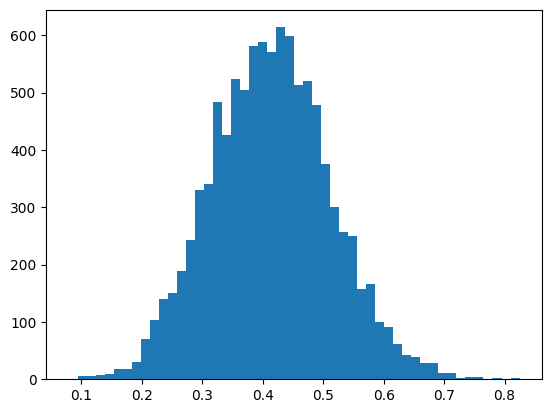

In [376]:
k = 10000
trials = np.zeros(k)
for i in range(k):
    x = random.randint(0, len(idx23))
    y = random.randint(0, len(idx18))
    trials[i] = np.sum(img23[x]*img18[y])
plt.hist(trials,50)
plt.show()

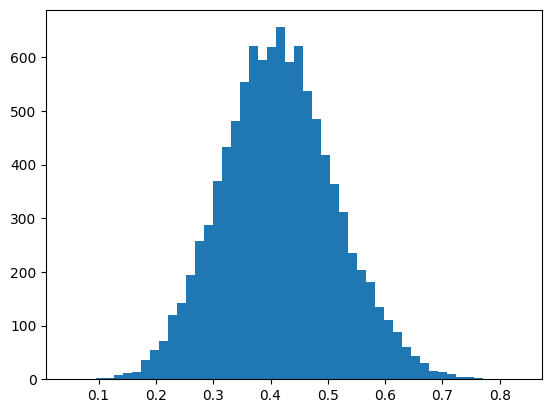

In [378]:
k = 10000
trials = np.zeros(k)
for i in range(k):
    x = random.randint(5, len(idx23)-5)
    y = random.randint(x-5, x+5)
    trials[i] = np.sum(img23[x]*img18[y])
plt.hist(trials,50)
plt.show()

In [38]:
max(idx23)

3318334

In [40]:
max(idx18)

3318334

In [39]:
len(df_train)

3318333

In [41]:
df_train.tail(3)

,caption,url
3318330,this is my very favourite design that i recent...,https://i.pinimg.com/736x/96/f0/77/96f07728efe...
3318331,man driving a car through the mountains,https://www.quickenloans.com/blog/wp-content/u...
3318332,a longtail boat with a flag goes by spectacula...,http://l7.alamy.com/zooms/338c4740f7b2480dbb72...


In [42]:
set([x for x in idx23 if idx23.count(x) > 1])

KeyboardInterrupt: 

In [43]:
count_idx18 = np.zeros(max(idx18)+1)
for i in range(len(idx18)):
    count_idx18[idx18[i]] += 1

In [95]:
np.sum(count_idx18 > 0.5)/len(df_train)*100

99.98237066623513

In [68]:
idx18[5]

7387

In [69]:
idx18.index(7387)

5

In [65]:
np.where(count_idx18>1)[0][0]

155882

In [70]:
count_idx18[155882]

2.0

In [71]:
for i in range(len(idx18)):
    if idx18[i] == 155882:
        print(i)

151541
153558


In [73]:
idx18[153558]

155882

In [67]:
idx18.index(155882)

151541

In [46]:
np.sum(count_idx18>1)
np.sum(count_idx18[count_idx18>1])

513

1034.0

In [58]:
print(len(df_train) - (len(idx18)))

64


In [59]:
len(missing_indexes)

465

In [60]:
df_train[df_train.duplicated(subset=['idx'],keep=False)]

KeyError: Index(['idx'], dtype='object')

In [47]:
count_idx23 = np.zeros(max(idx23)+1)
for i in range(len(idx23)):
    count_idx23[idx23[i]] += 1

In [55]:
np.sum(count_idx23>1)

0

In [49]:
missing_indexes = list(set(idx23) - set(idx18))

In [54]:
df_train['url'][-2+missing_indexes[0]]

'https://thumb9.shutterstock.com/display_pic_with_logo/1813379/428150692/stock-vector-original-youth-seamless-patterns-repeating-image-for-using-pattern-on-any-items-t-shirts-428150692.jpg'

In [124]:
img18.shape

(3318269, 512)

In [126]:
x = 2876
np.sum(img23[idx23.index(x)]*img18[idx18.index(x)])

0.9277